### Data Description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("ExcelEssentialsQuiz.csv",parse_dates=['Date'])

In [3]:
df

,Date,AdjCloseRSP,AdjCloseSPY,AdjCloseAmazon,AdjCloseDukeenergy,RSP,SPY,Amazon,DukeEnergy
0,2015-01-05,81.31,209.03,429.23,74.90,0.0072,0.0128,0.0175,-0.0135
1,2015-01-04,80.73,206.38,421.78,75.92,0.0041,0.0098,0.1253,0.0102
2,2015-02-03,80.40,204.37,372.10,75.15,-0.0096,-0.0158,-0.0214,-0.0228
3,2015-02-02,81.18,207.63,380.16,76.88,0.0557,0.0547,0.0698,-0.0943
4,2015-02-01,76.78,196.58,354.53,84.48,-0.0297,-0.0301,0.1331,0.0422
...,...,...,...,...,...,...,...,...,...
140,2003-02-09,24.96,78.59,48.43,17.55,-0.0149,-0.0110,0.0445,0.0419
141,2003-01-08,25.34,79.46,46.32,16.84,0.0422,0.0204,0.1065,-0.0113
142,2003-01-07,24.29,77.85,41.64,17.03,0.0233,0.0179,0.1367,-0.1282
143,2003-02-06,23.73,76.47,36.32,19.36,0.0086,0.0106,0.0119,0.0290


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                145 non-null    datetime64[ns]
 1   AdjCloseRSP         145 non-null    float64       
 2   AdjCloseSPY         145 non-null    float64       
 3   AdjCloseAmazon      145 non-null    float64       
 4   AdjCloseDukeenergy  145 non-null    float64       
 5   RSP                 144 non-null    float64       
 6   SPY                 144 non-null    float64       
 7   Amazon              144 non-null    float64       
 8   DukeEnergy          144 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.3 KB


In [5]:
df.describe()

,AdjCloseRSP,AdjCloseSPY,AdjCloseAmazon,AdjCloseDukeenergy,RSP,SPY,Amazon,DukeEnergy
count,145.000000,145.000000,145.000000,145.000000,144.000000,144.000000,144.000000,144.000000
mean,43.672759,119.621103,143.740000,42.901862,0.008615,0.007058,0.017235,0.009599
std,15.167649,34.792588,112.943003,16.409382,0.048503,0.040371,0.112402,0.041409
min,20.380000,64.350000,26.890000,16.840000,-0.234500,-0.180500,-0.363600,-0.128200
25%,33.390000,95.350000,45.150000,31.340000,-0.013475,-0.013425,-0.047000,-0.007925
50%,40.160000,112.010000,89.150000,37.870000,0.017050,0.012800,0.021350,0.016800
75%,48.550000,130.230000,228.350000,56.730000,0.037150,0.031050,0.092225,0.033075
max,81.310000,209.030000,429.230000,84.480000,0.171400,0.103600,0.432700,0.125400


In [6]:
df.columns

Index(['Date', 'AdjCloseRSP', 'AdjCloseSPY', 'AdjCloseAmazon',
       'AdjCloseDukeenergy', 'RSP', 'SPY', 'Amazon', 'DukeEnergy'],
      dtype='object')

In [7]:
df[df['AdjCloseAmazon'] == 429.230000]

,Date,AdjCloseRSP,AdjCloseSPY,AdjCloseAmazon,AdjCloseDukeenergy,RSP,SPY,Amazon,DukeEnergy
0,2015-01-05,81.31,209.03,429.23,74.9,0.0072,0.0128,0.0175,-0.0135


### Data Visualization

### Univariate Data Exploration

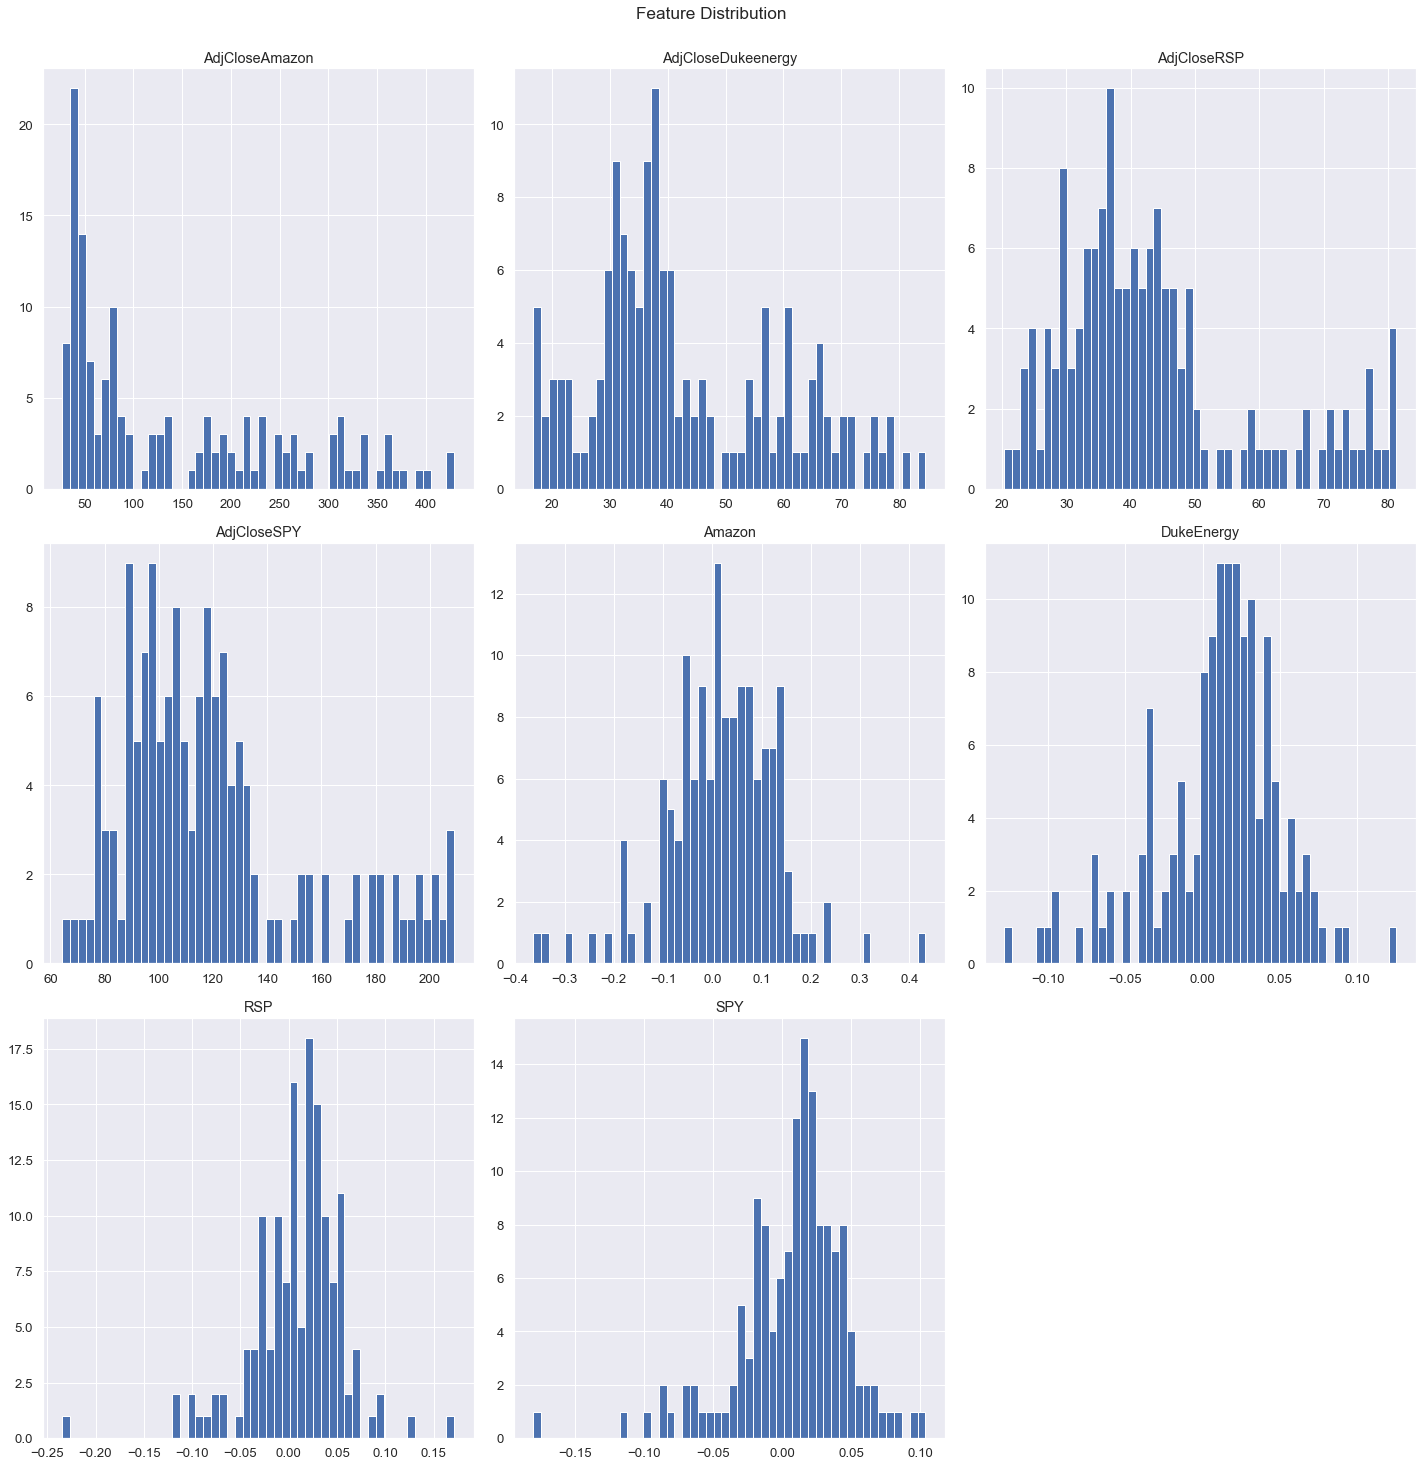

In [8]:
df.hist(bins=50, figsize=(20,20))

plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show();

<Figure size 1440x1440 with 0 Axes>

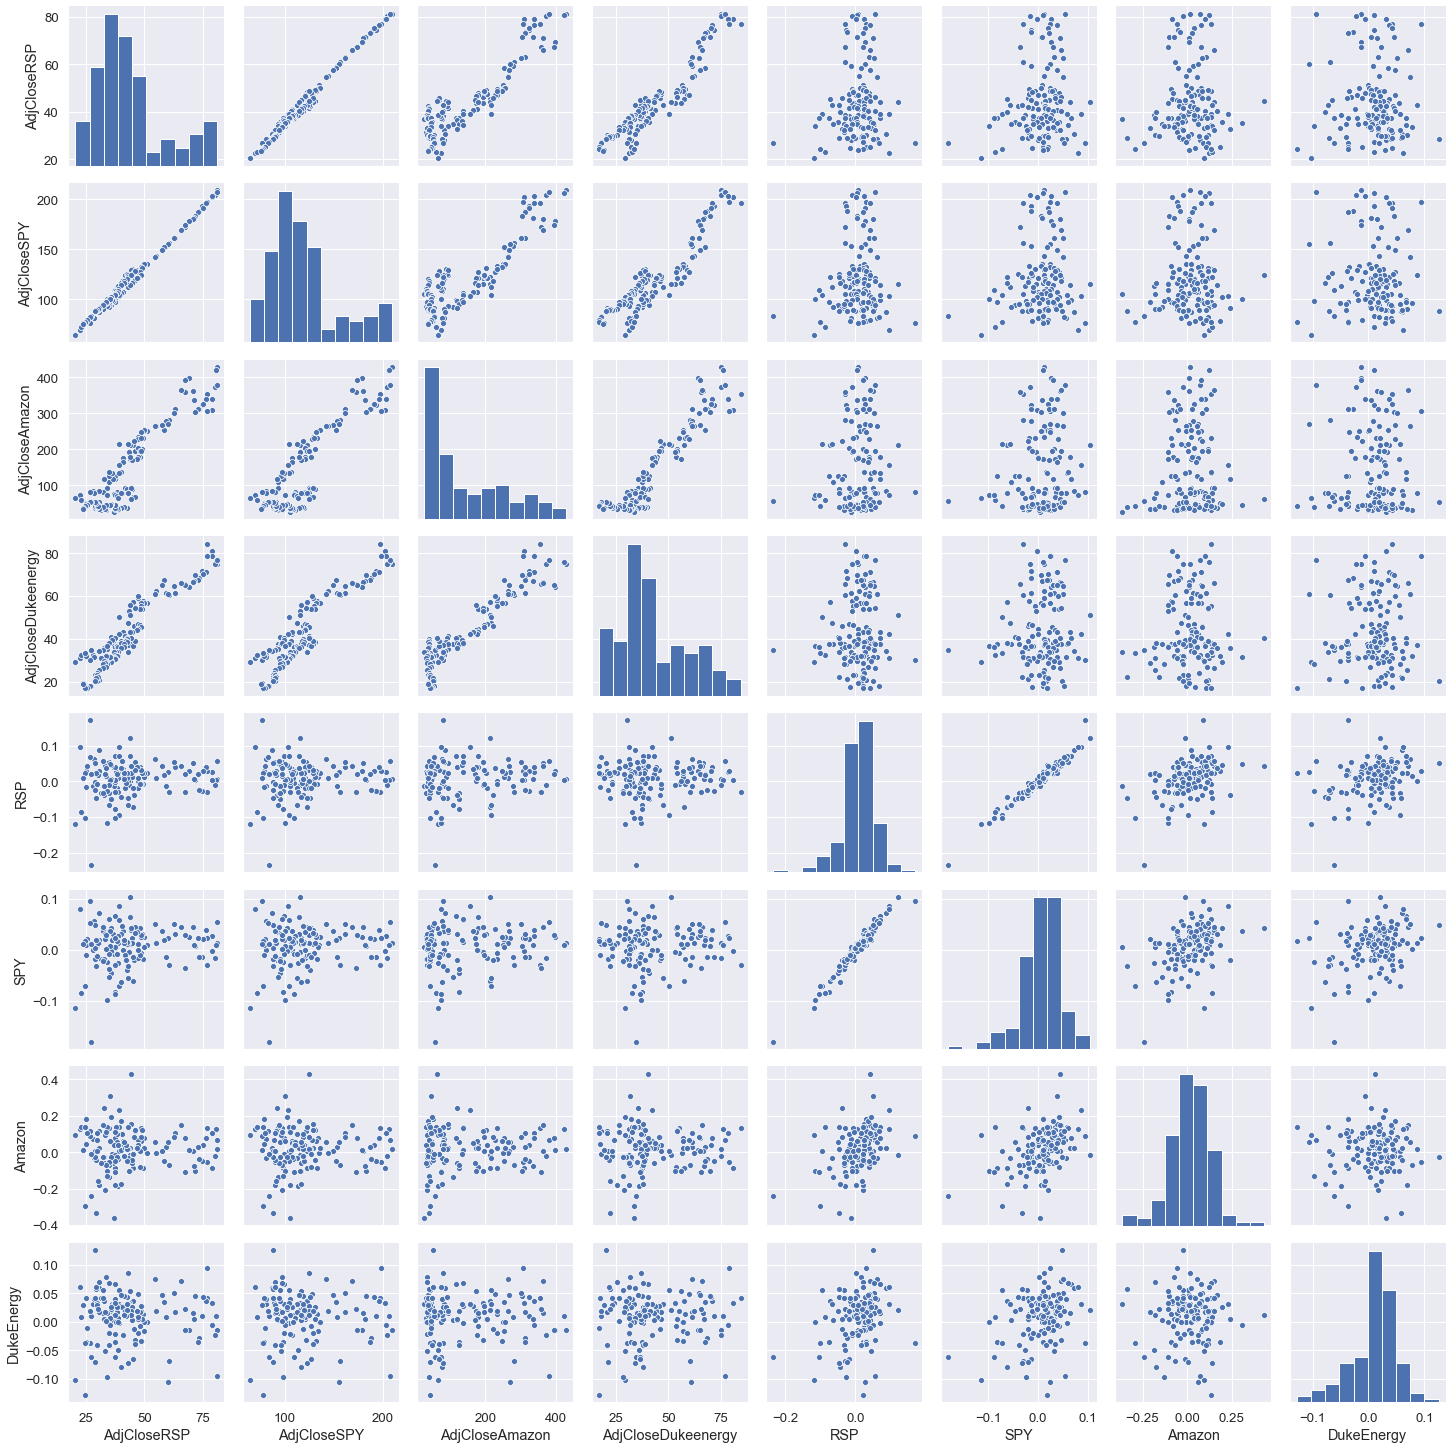

In [9]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df)
plt.show()

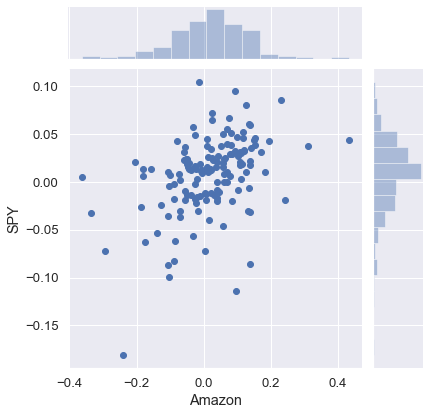

In [10]:
sns.jointplot(x='Amazon', y='SPY',data=df, kind='scatter')


plt.show()

In [11]:
df.isnull().sum()

Date                  0
AdjCloseRSP           0
AdjCloseSPY           0
AdjCloseAmazon        0
AdjCloseDukeenergy    0
RSP                   1
SPY                   1
Amazon                1
DukeEnergy            1
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Date                  0
AdjCloseRSP           0
AdjCloseSPY           0
AdjCloseAmazon        0
AdjCloseDukeenergy    0
RSP                   0
SPY                   0
Amazon                0
DukeEnergy            0
dtype: int64

### Linear Regression

In [14]:
df.columns

Index(['Date', 'AdjCloseRSP', 'AdjCloseSPY', 'AdjCloseAmazon',
       'AdjCloseDukeenergy', 'RSP', 'SPY', 'Amazon', 'DukeEnergy'],
      dtype='object')

In [15]:
y = df['SPY']
x1 = df['Amazon']

In [16]:
x = sm.add_constant(x1)

In [17]:
results = sm.OLS(y,x).fit()

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     30.40
Date:                Sat, 22 Aug 2020   Prob (F-statistic):           1.61e-07
Time:                        21:05:03   Log-Likelihood:                 272.33
No. Observations:                 144   AIC:                            -540.7
Df Residuals:                     142   BIC:                            -534.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.003      1.438      0.153      -0.002       0.011
Amazon         0.1508      0.027      5.514      0.000       0.097       0.205
==============================================================================
Omnibus:                       32.109   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.438
Skew:                          -0.979   Prob(JB):                     1.02e-14
Kurtosis:                       5.629   Cond. No.                         8.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""